# Section 04: Themes

### **`01-Moving the legend`**

To change stylistic elements of a plot, call [**`theme()`**](http://www.rdocumentation.org/packages/ggplot2/functions/theme) and set plot properties to a new value. For example, the following changes the legend position.

    p + theme(legend.position = new_value)

Here, the new value can be

-   `"top"`, `"bottom"`, `"left"`, or `"right'"`: place it at that side of the plot.

-   `"none"`: don't draw it.

-   `c(x, y)`: `c(0, 0)` means the bottom-left and `c(1, 1)` means the top-right.

In [1]:
library(tidyverse)
str(economics)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



spec_tbl_df [574 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date    : Date[1:574], format: "1967-07-01" "1967-08-01" ...
 $ pce     : num [1:574] 507 510 516 512 517 ...
 $ pop     : num [1:574] 198712 198911 199113 199311 199498 ...
 $ psavert : num [1:574] 12.6 12.6 11.9 12.9 12.8 11.8 11.7 12.3 11.7 12.3 ...
 $ uempmed : num [1:574] 4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: num [1:574] 2944 2945 2958 3143 3066 ...


#### `Questions:`

-   Update the plot to remove the legend.

-   *Look at the changes in the plot.*

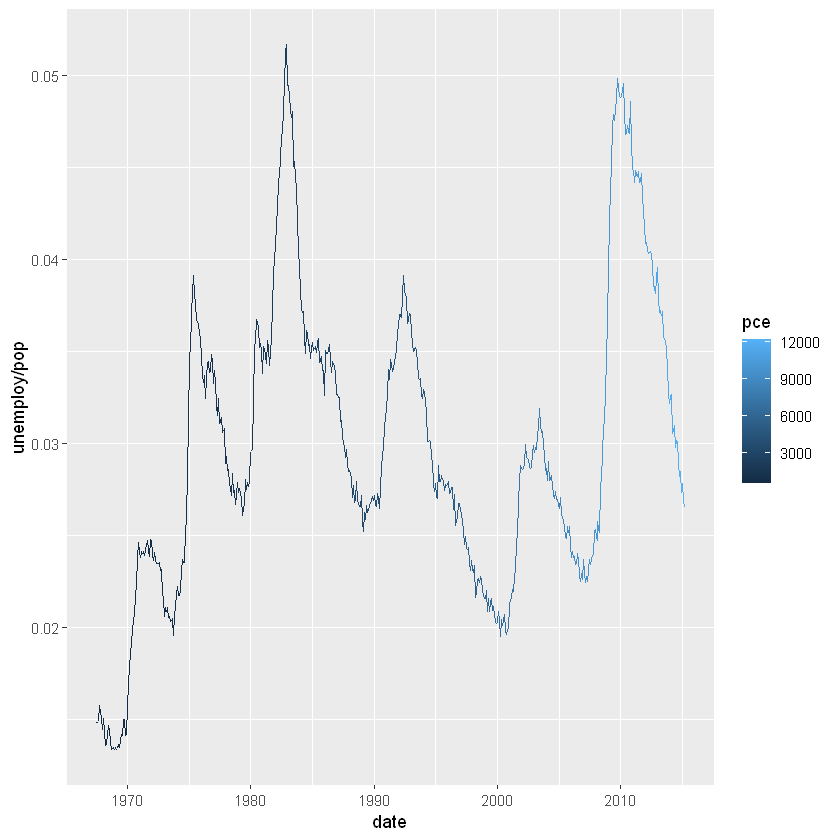

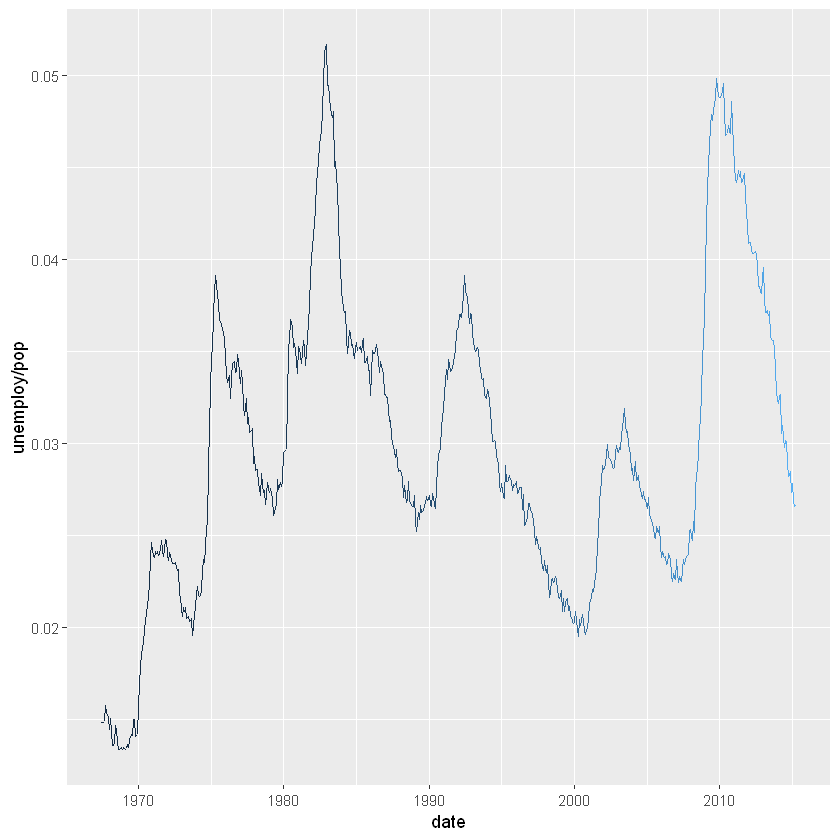

In [2]:
plt_prop_unemployed_over_time <- ggplot(economics, aes(date, unemploy/pop )) +    geom_line(aes(color = pce)) + 
  theme(legend.position = "right")
 

# View the default plot
plt_prop_unemployed_over_time

# Remove legend entirely
plt_prop_unemployed_over_time +
  theme(legend.position = "none")

-   Update the plot to position the legend at the bottom of the plot.
-   Look at the changes in the plot.


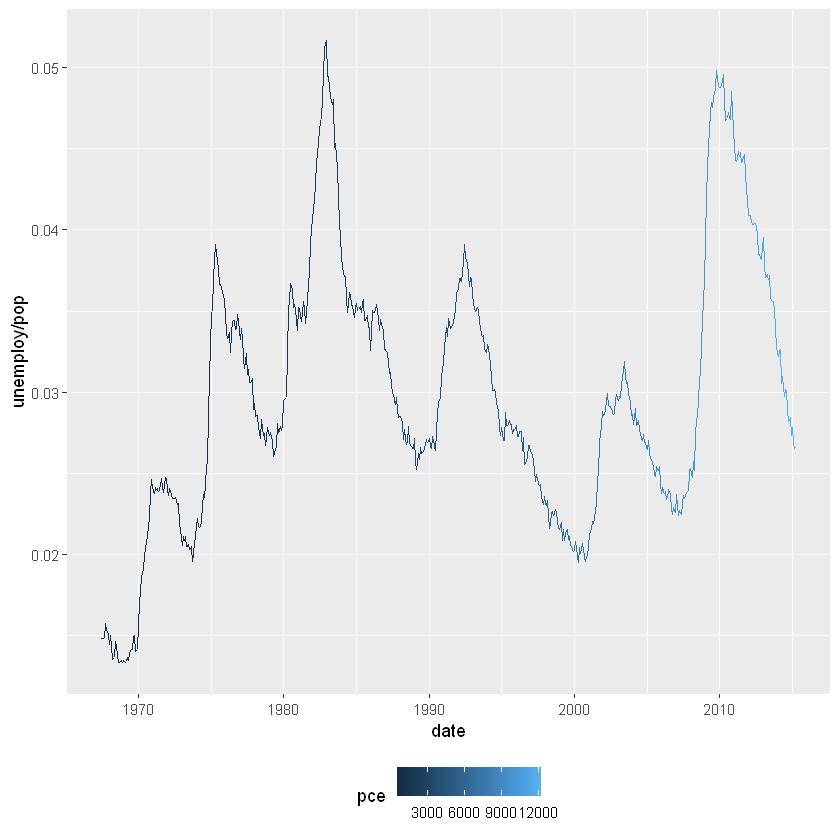

In [3]:
# Position the legend at the bottom of the plot
plt_prop_unemployed_over_time +
  theme(legend.position = "bottom")

-   Position the legend inside the plot, with x-position `0.6` and y-position `0.1`.
-   Look at the changes in the plot.

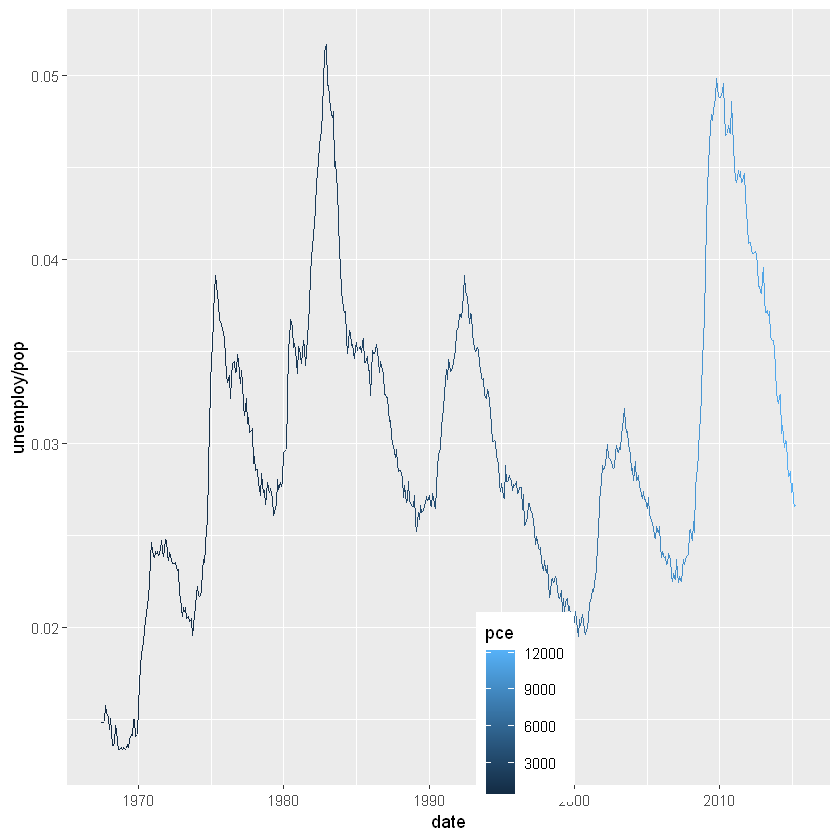

In [4]:
# Position the legend inside the plot at (0.6, 0.1)
plt_prop_unemployed_over_time +
  theme(legend.position = c(0.6, 0.1))

### **`02-Modifying theme elements`**

To set the style of a line, you use [**`element_line()`**](https://www.rdocumentation.org/packages/ggplot2/topics/margin). For example, to make the axis lines into red, dashed lines, you would use the following.

    p + theme(axis.line = element_line(color = "red", linetype = "dashed"))

Similarly, `element_rect()` changes rectangles and `element_text()` changes text. You can remove a plot element using `element_blank()`.

`plt_prop_unemployed_over_time` is available

#### `Questions:`

-   Give all rectangles in the plot, (the `rect` element) a `fill` color of `"grey92"` (very pale grey).

-   Remove the `legend.key`'s outline by setting its `color` to be missing.

-   Look at the changes in the plot.

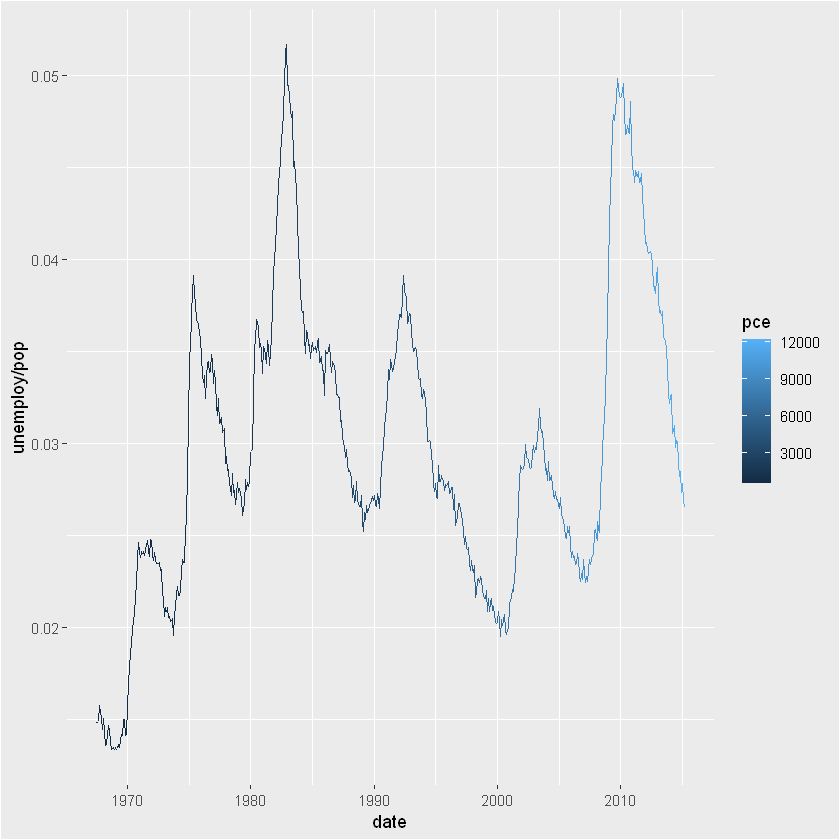

In [5]:
plt_prop_unemployed_over_time +
  theme(
    # For all rectangles, set the fill color to grey92
    rect = element_rect(fill = "grey92") ,
    # For the legend key, turn off the outline
    legend.key = element_rect(color = NA))

-   Remove the axis ticks, `axis.ticks` by making them a blank element.

-   Remove the panel gridlines, `panel.grid` in the same way.

-   *Look at the changes in the plot.*

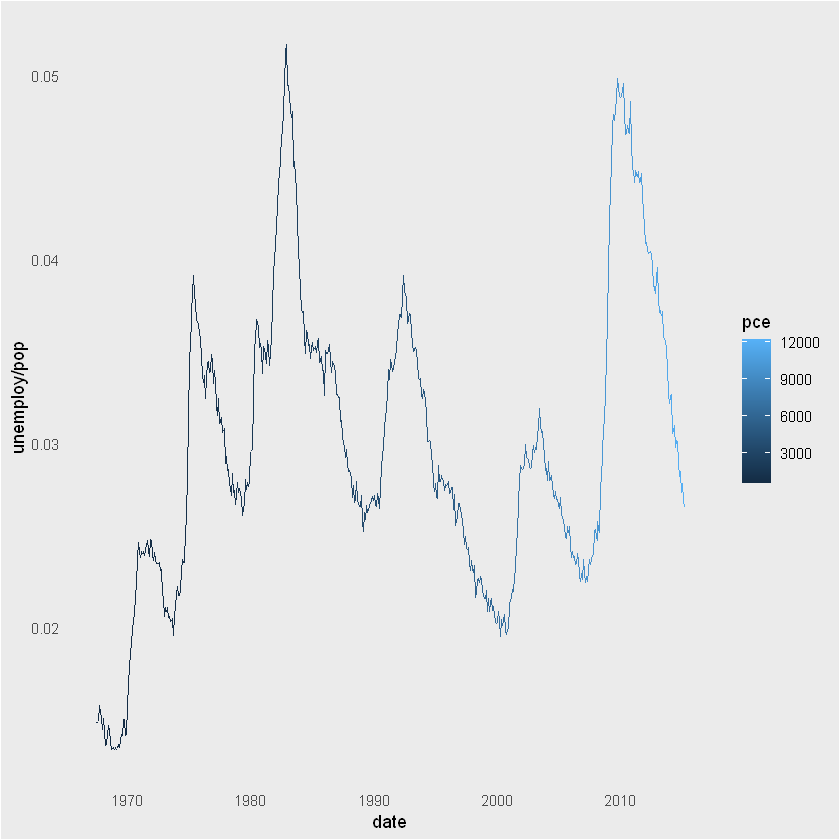

In [7]:
plt_prop_unemployed_over_time +
  theme(
    rect = element_rect(fill = "grey92"),
    legend.key = element_rect(color = NA),
    # Turn off axis ticks
    axis.ticks = element_blank(),
    # Turn off the panel grid
    panel.grid = element_blank()
  )

-   Add the major horizontal grid lines back to the plot using `panel.grid.major.y`.
-   Set the line `color` to `"white"`, `size` to `0.5`, and `linetype` to `"dotted"`.
-   *Look at the changes in the plot.*


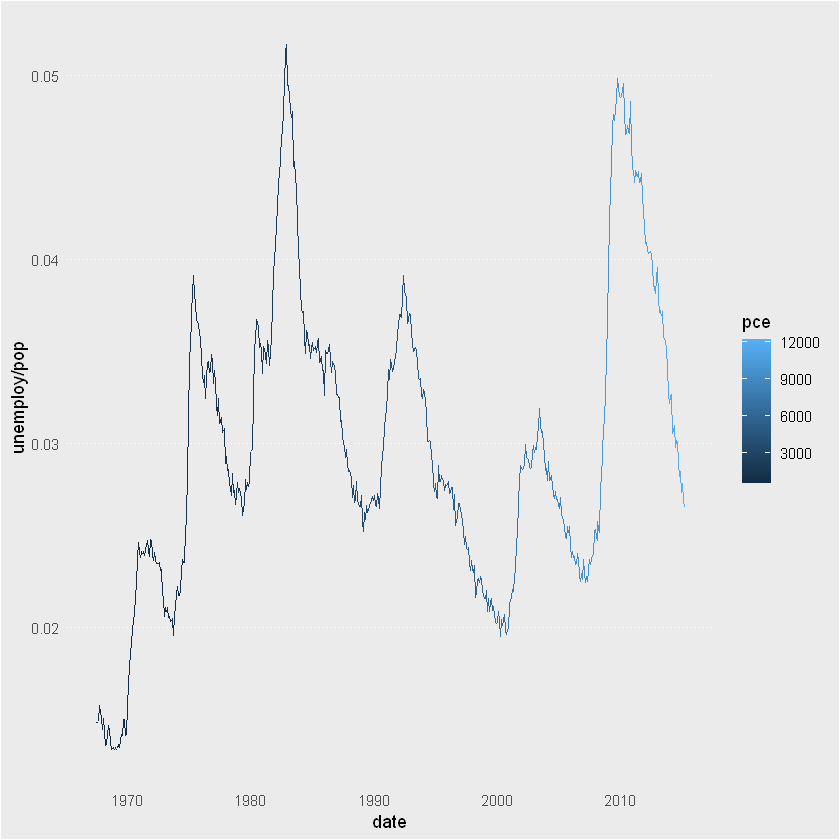

In [8]:
plt_prop_unemployed_over_time +
  theme(
    rect = element_rect(fill = "grey92"),
    legend.key = element_rect(color = NA),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    # Add major y-axis panel grid lines back
    panel.grid.major.y = element_line(
      # Set the color to white
      color = "white",
      # Set the size to 0.5
      size = 0.5,
      # Set the line type to dotted
      linetype = "dotted"
    )
  )

-   Make the axis tick labels' text, `axis.text`, less prominent by changing the `color` to `"grey25"`.

-   Increase the `plot.title`'s, `size` to `16` and change its font `face` to `"italic"`.

-   *Look at the changes in the plot.*

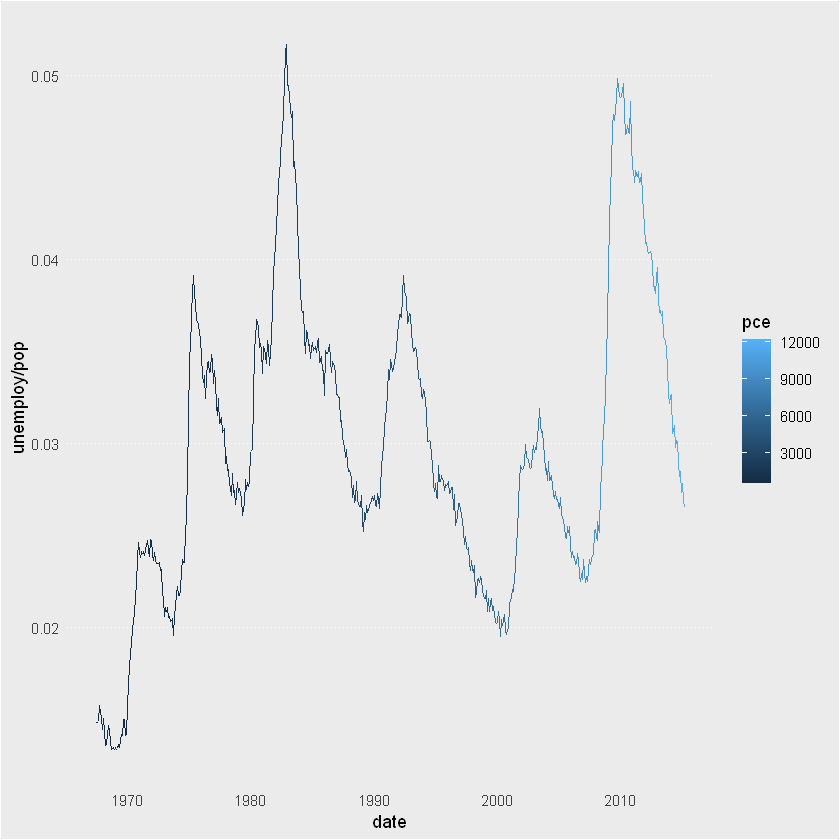

In [9]:
plt_prop_unemployed_over_time +
  theme(
    rect = element_rect(fill = "grey92"),
    legend.key = element_rect(color = NA),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    panel.grid.major.y = element_line(
      color = "white",
      size = 0.5,
      linetype = "dotted"
    ),
    # Set the axis text color to grey25
    axis.text = element_text(color = "grey25"),
    # Set the plot title font face to italic and font size to 16
    plot.title = element_text(size = 16, face = "italic")
  )

### **`03-Modifying whitespace`**

**Whitespace** means all the non-visible margins and spacing in the plot.

To set a single whitespace value, use [**`unit(x, unit)`**](https://www.rdocumentation.org/packages/grid/topics/unit), where `x` is the amount and `unit` is the unit of measure.

Borders require you to set 4 positions, so use [**`margin(top, right, bottom, left, unit)`**](https://www.rdocumentation.org/packages/ggplot2/topics/margin). To remember the margin order, think **TRouBLe**.

The default unit is `"pt"` (points), which scales well with text. Other options include "cm", "in" (inches) and "lines" (of text).

`plt_mpg_vs_wt_by_cyl` is available. The panel and legend are wrapped in blue boxes so you can see how they change.

In [10]:
mtcars <- read.csv("..\\00_Datasets\\mtcars.csv", header=TRUE)
str(mtcars)

'data.frame':	32 obs. of  12 variables:
 $ X   : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


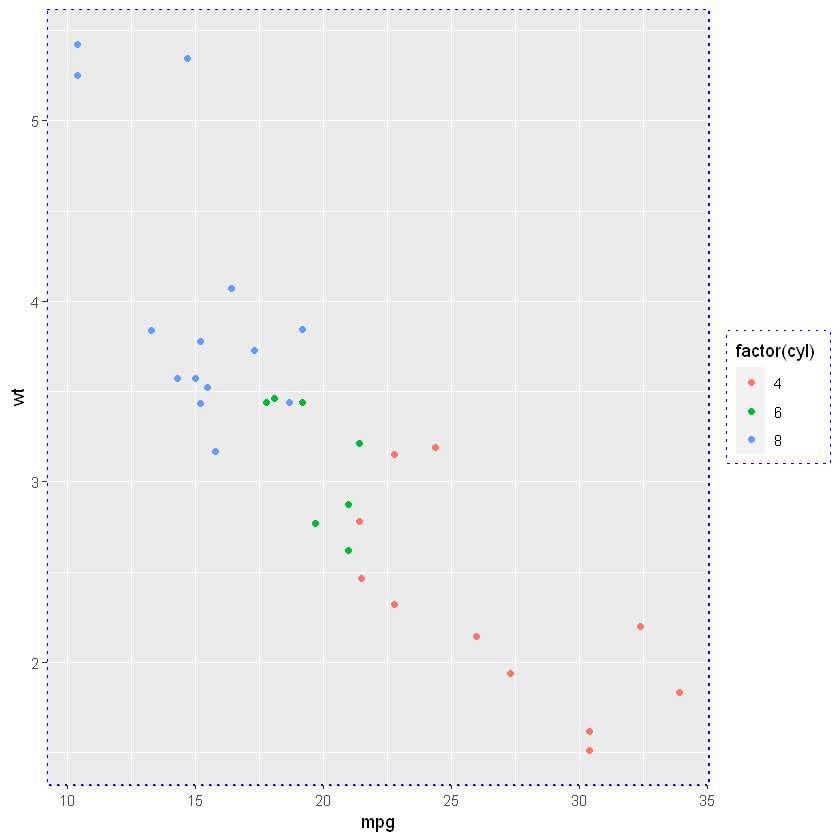

In [11]:
plt_mpg_vs_wt_by_cyl <- ggplot(mtcars, aes(mpg, wt)) + 
                            geom_point(aes(color = factor(cyl))) + 
                            theme(panel.border = element_rect(color = "blue",
                                                              fill=NA, size=0.6,
                                                              linetype = "dotted"),
                              legend.box.background = element_rect(color =  "blue",
                                                              fill=NA, size=0.6,
                                                              linetype = "dotted"))
plt_mpg_vs_wt_by_cyl

#### `Questions :`

-   Give the axis tick length, `axis.ticks.length`, a unit of `2` `"lines"`.

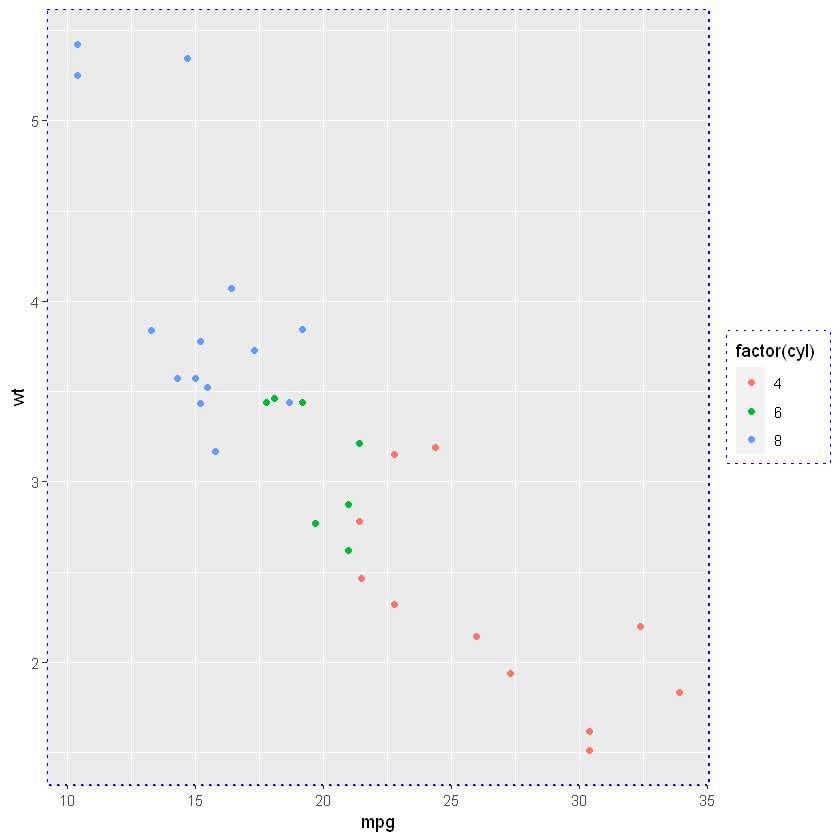

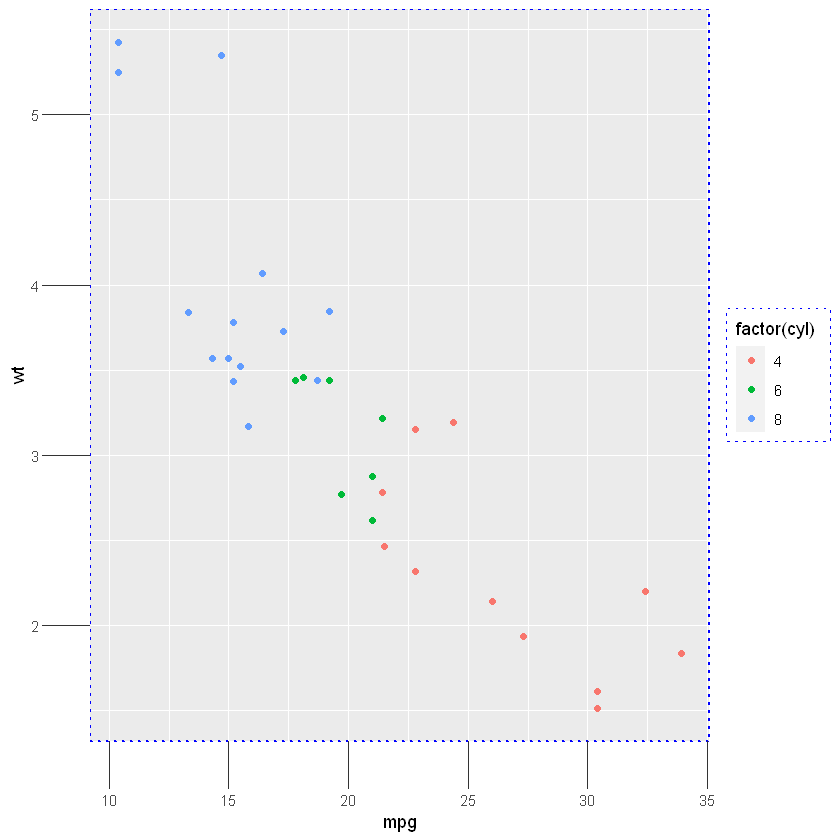

In [13]:
# View the original plot
plt_mpg_vs_wt_by_cyl

plt_mpg_vs_wt_by_cyl +
  theme(
    # Set the axis tick length to 2 lines
    axis.ticks.length = unit(2, "lines")
  )

-   Give the legend key size, `legend.key.size`, a unit of `3` centimeters (`"cm"`).

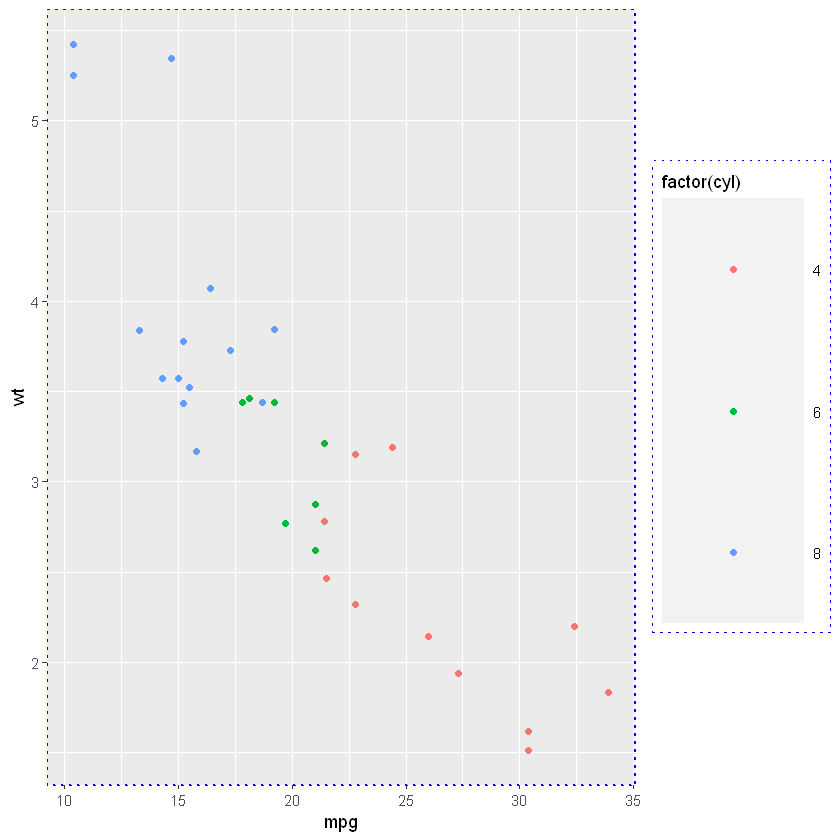

In [14]:
plt_mpg_vs_wt_by_cyl +
  theme(
    # Set the legend key size to 3 centimeters
    legend.key.size = unit(3,"cm")
  )

-   Set the `legend.margin` to `20` points (`"pt"`) on the top, `30` pts on the right, `40` pts on the bottom, and `50` pts on the left.\

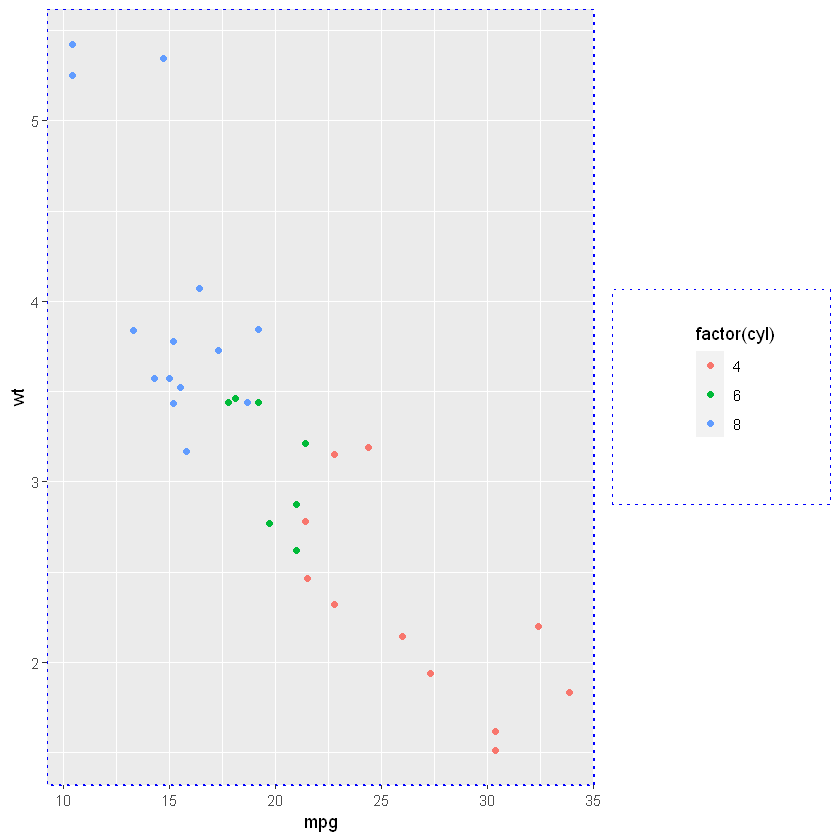

In [15]:
    plt_mpg_vs_wt_by_cyl +
      theme(
        # Set the legend margin to (20, 30, 40, 50) points
        legend.margin = margin(
          t = 20,
          r = 30,
          b = 40,
          l = 50,
          u = "pt"

        )
      )

- Set the plot margin, `plot.margin`, to `10`, `30`, `50`, and `70` millimeters (`"mm"`).

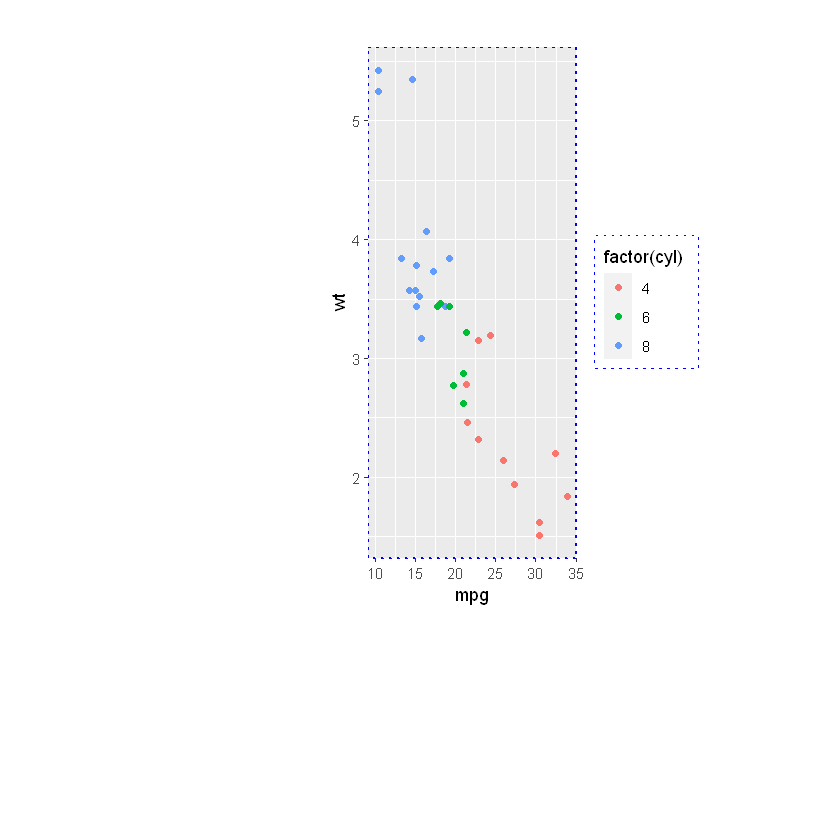

In [17]:
plt_mpg_vs_wt_by_cyl +
  theme(
    # Set the plot margin to (10, 30, 50, 70) millimeters
    plot.margin = margin(
      t = 10,
      r = 30,
      b = 50, 
      l = 70,
      u = "mm"

    )
  )

### **`04-Built-in themes`**

In addition to making your own themes, there are several [**out-of-the-box solutions**](https://ggplot2.tidyverse.org/reference/ggtheme.html) that may save you lots of time.

-   [**`theme_gray()`**](http://www.rdocumentation.org/packages/ggplot2/functions/ggtheme) is the default.

-   [**`theme_bw()`**](http://www.rdocumentation.org/packages/ggplot2/functions/ggtheme) is useful when you use transparency.

-   [**`theme_classic()`**](http://www.rdocumentation.org/packages/ggplot2/functions/ggtheme) is more traditional.

-   [**`theme_void()`**](http://www.rdocumentation.org/packages/ggplot2/functions/ggtheme) removes everything but the data.

`plt_prop_unemployed_over_time` is available.

#### `Questions:`

-   Add a black and white theme, `theme_bw()`, to the plot.

-   *What changed in the plot?*

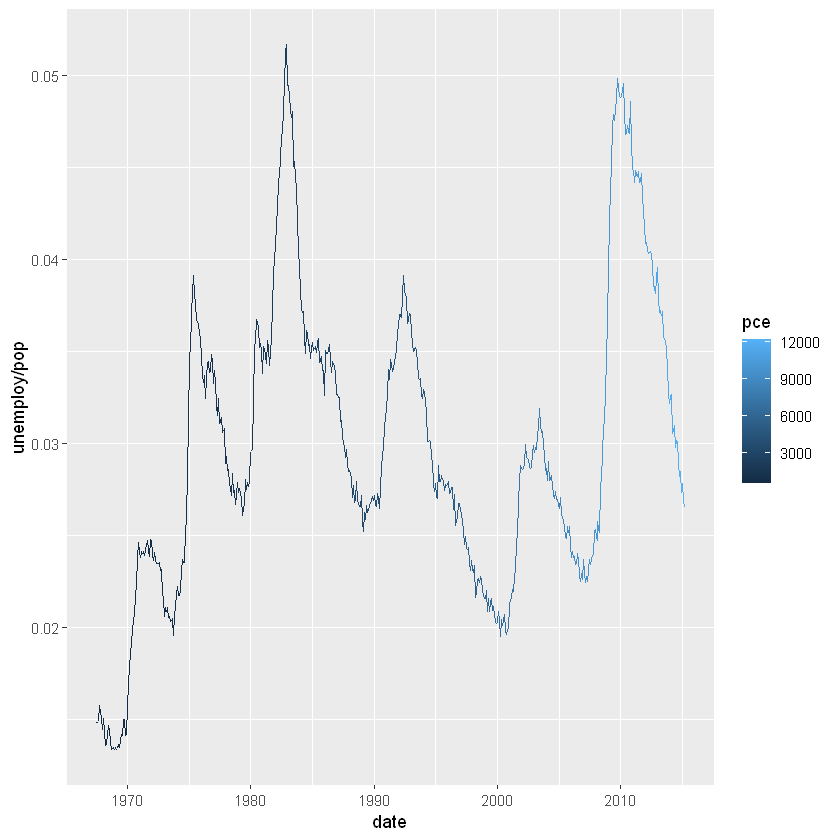

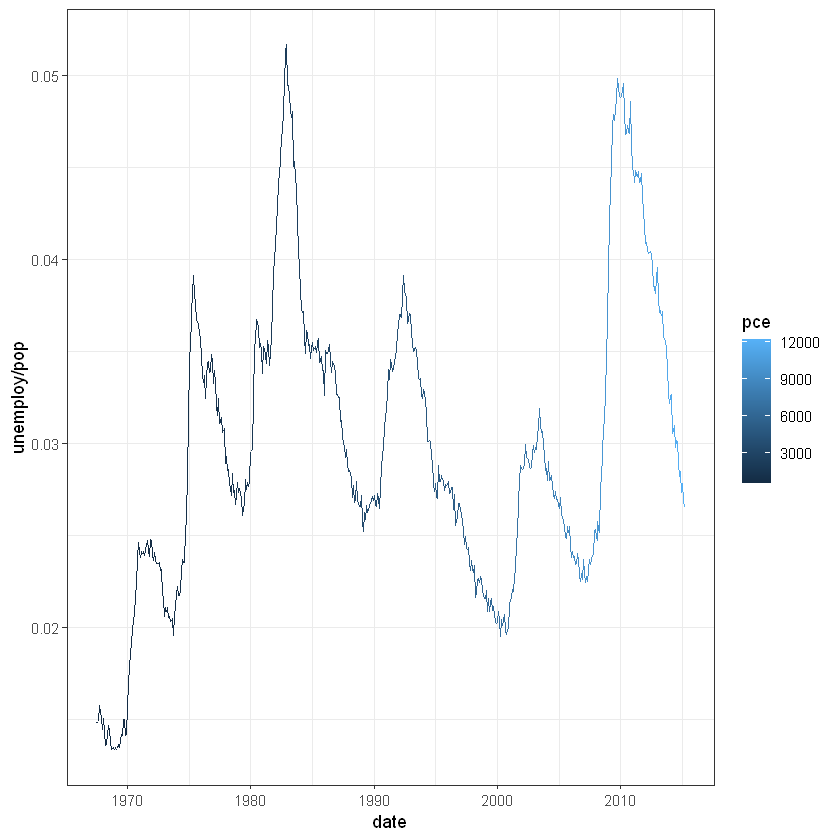

In [18]:
plt_prop_unemployed_over_time

# Add a black and white theme
plt_prop_unemployed_over_time +
  theme_bw()

-   Add a classic theme, `theme_classic()`, to the plot.
-   *What changed in the plot?*

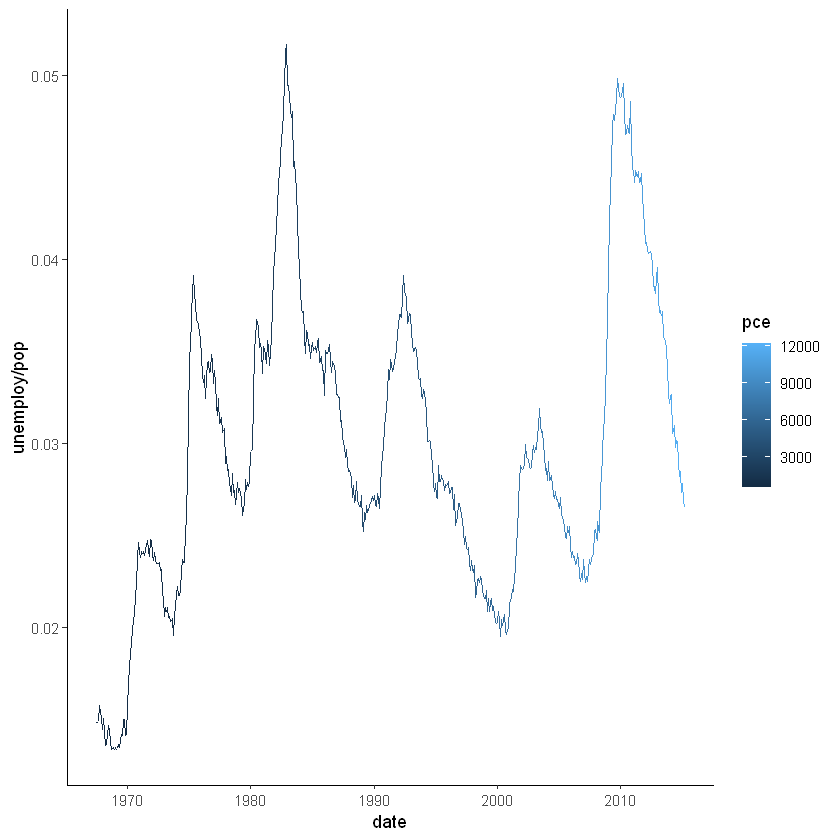

In [19]:
# Add a classic theme
plt_prop_unemployed_over_time +
  theme_classic()

-   Add a void theme, `theme_void()`, to the plot.

-   *What changed in the plot?*

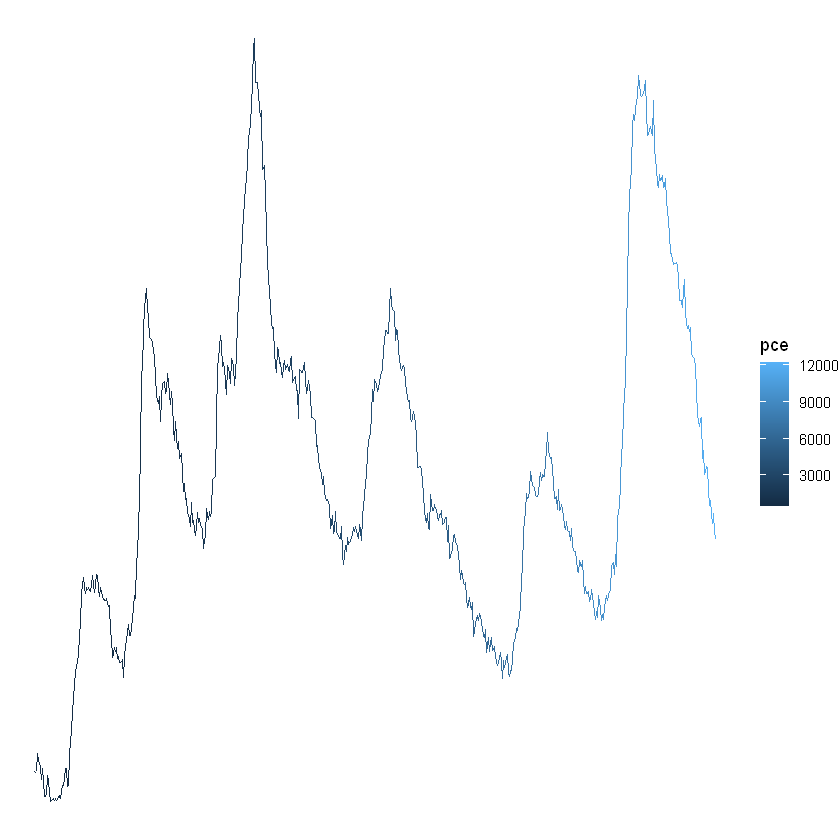

In [20]:
# Add a void theme
plt_prop_unemployed_over_time +
  theme_void()

### **`05-Exploring ggthemes`**

-   Add a [**fivethirtyeight.com**](https://fivethirtyeight.com/) theme, `theme_fivethirtyeight()`, to the plot.

-   *What changed in the plot?*


In [22]:
install.packages("ggthemes")


package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MOHAMAD\AppData\Local\Temp\RtmpMjN1A0\downloaded_packages


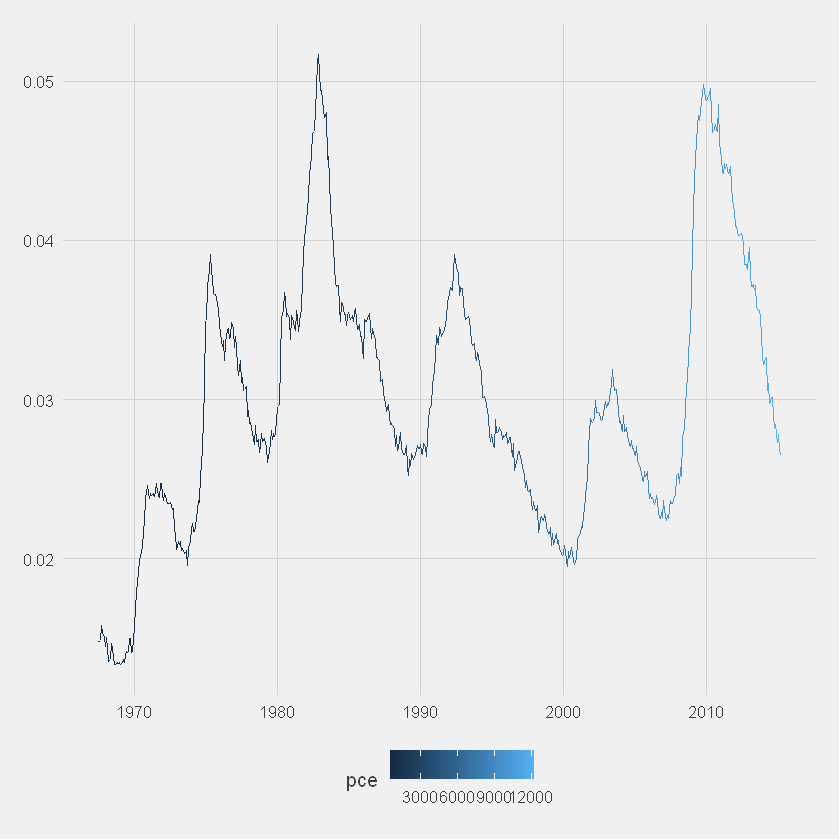

In [23]:
library(ggthemes)
# Use the fivethirtyeight theme
plt_prop_unemployed_over_time +
  ggthemes::theme_fivethirtyeight()

-   Add an [**Edward Tufte**](https://www.edwardtufte.com/tufte) theme, `theme_tufte()`, to the plot.

-   *What changed in the plot?*

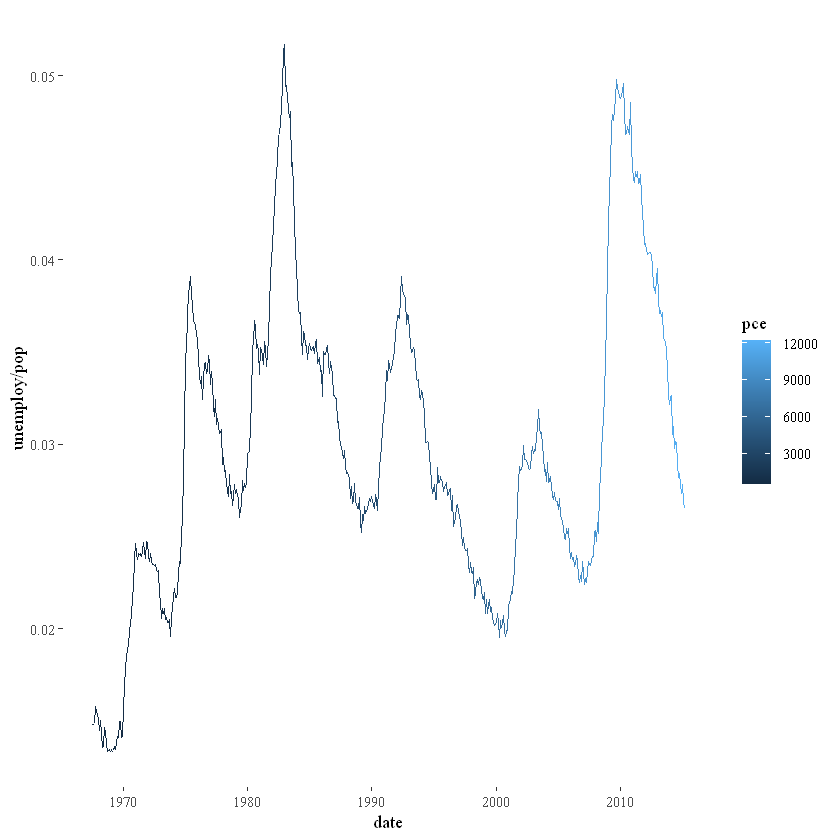

In [24]:
# Use Tufte's theme
plt_prop_unemployed_over_time +
  theme_tufte()

-   Add a [**Wall Street Journal**](https://www.wsj.com/) theme, `theme_wsj()`, to the plot.

-   *What changed in the plot?*

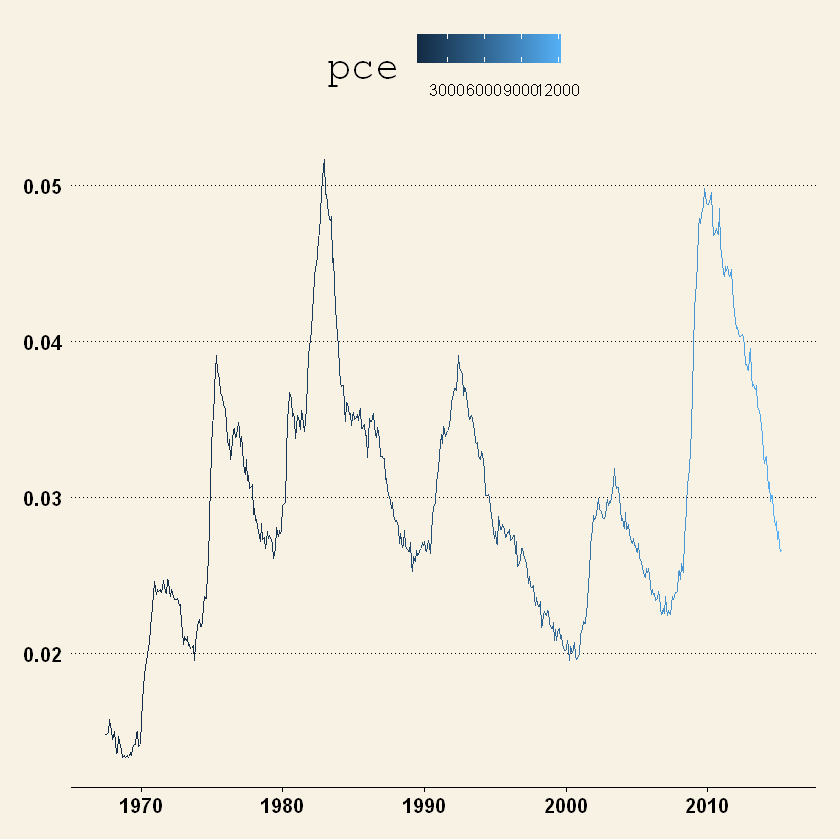

In [25]:
# Use the Wall Street Journal theme
plt_prop_unemployed_over_time +
  theme_wsj()

### `06-Setting themes`

Reusing a theme across many plots helps to provide a consistent style. You have several options for this.

1.  Assign the theme to a variable, and add it to each plot.

2.  Set your theme as the default using [**`theme_set()`**](https://www.rdocumentation.org/packages/ggplot2/topics/theme_get).

A good strategy that you'll use here is to begin with a built-in theme then modify it.

`plt_prop_unemployed_over_time` is available. The theme you made earlier is shown in the sample code.

-   Assign the theme to `theme_recession`.

-   Add the Tufte theme and `theme_recession` together.

Use the Tufte recession theme by adding it to the plot.

In [26]:
library(ggplot2)
ggplot2::theme()

 Named list()
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

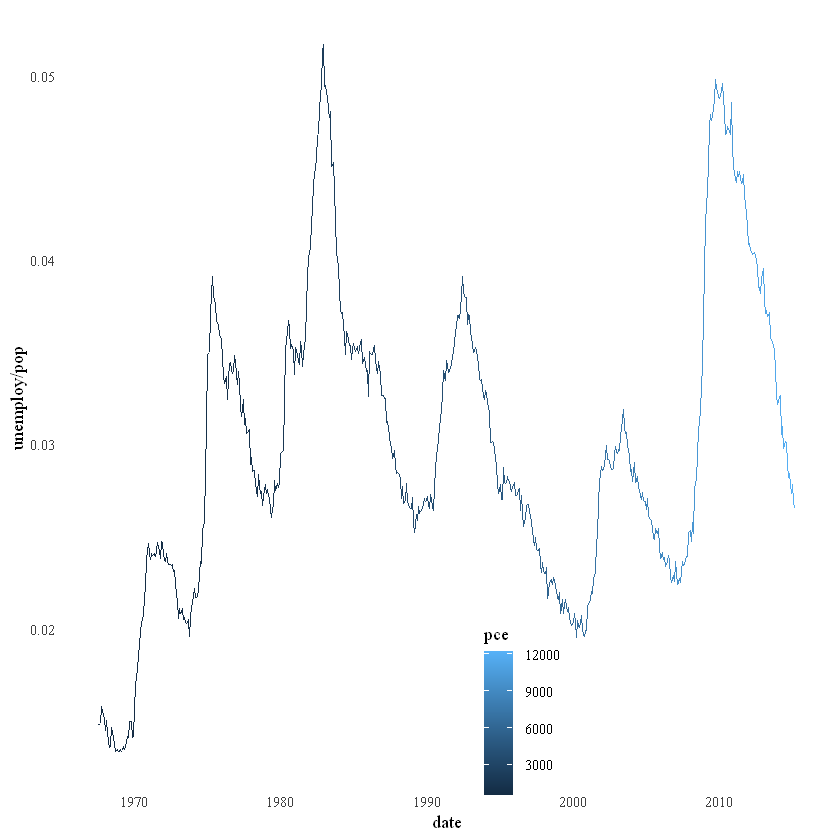

In [27]:
# Save the theme as theme_recession
theme_recession <- theme(
  rect = element_rect(fill = "grey92"),
  legend.key = element_rect(color = NA),
  axis.ticks = element_blank(),
  panel.grid = element_blank(),
  panel.grid.major.y = element_line(color = "white", size = 0.5, linetype = "dotted"),
  axis.text = element_text(color = "grey25"),
  plot.title = element_text(face = "italic", size = 16),
  legend.position = c(0.6, 0.1)
)

# Combine the Tufte theme with theme_recession
theme_tufte_recession <-  theme_tufte() + theme_recession

# Add the Tufte recession theme to the plot
plt_prop_unemployed_over_time + theme_tufte_recession

-   Use `theme_set()` to set `theme_tufte_recession` as the default theme.

-   Draw the plot, `plt_prop_unemployed_over_time`, without explicitly adding a theme.

-   *Look at the plot. Was it styled with the default theme or the new theme?*\*

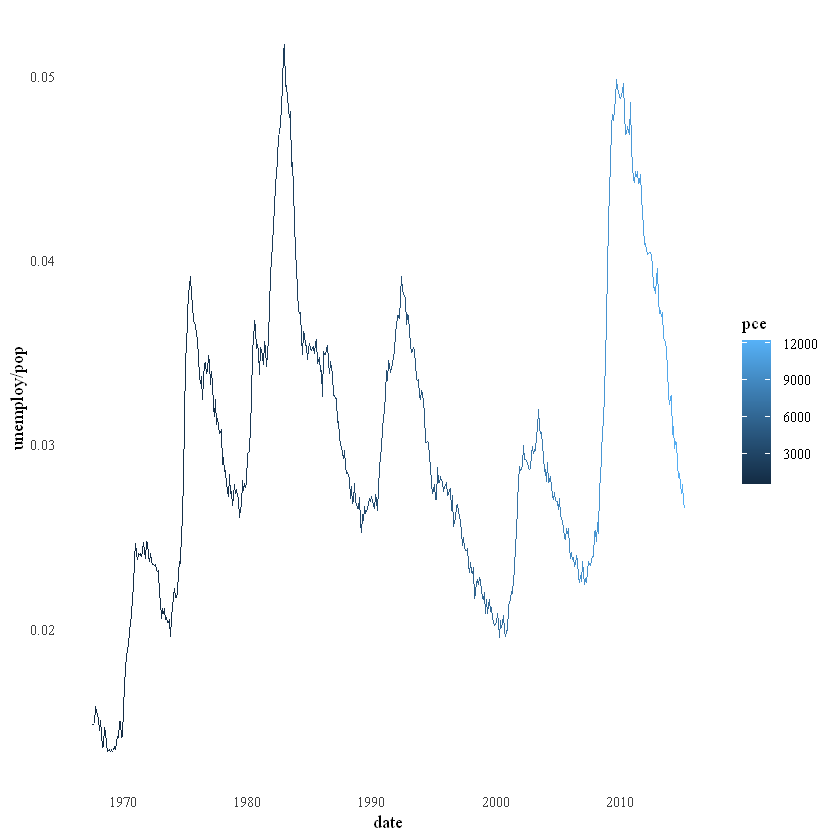

In [28]:
theme_recession <- theme(
  rect = element_rect(fill = "grey92"),
  legend.key = element_rect(color = NA),
  axis.ticks = element_blank(),
  panel.grid = element_blank(),
  panel.grid.major.y = element_line(color = "white", size = 0.5, linetype = "dotted"),
  axis.text = element_text(color = "grey25"),
  plot.title = element_text(face = "italic", size = 16),
  legend.position = c(0.6, 0.1)
)
theme_tufte_recession <- theme_tufte() + theme_recession

# Set theme_tufte_recession as the default theme
theme_set(theme_tufte_recession)

# Draw the plot (without explicitly adding a theme)
plt_prop_unemployed_over_time

### **`07-Publication-quality plots`**

We've seen many examples of beautiful, publication-quality plots. Let's take a final look and put all the pieces together.

`plt_prop_unemployed_over_time` is available.

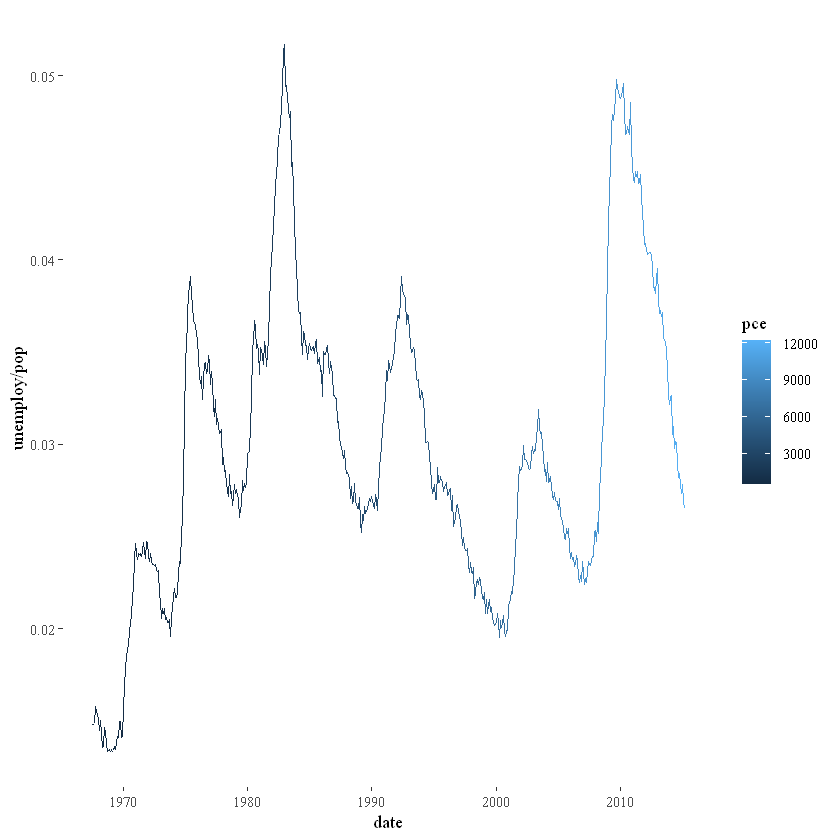

In [29]:
plt_prop_unemployed_over_time +
  # Add Tufte's theme
   theme_tufte()

-   Call the function to add individual theme elements. Turn off the legend and the axis ticks.

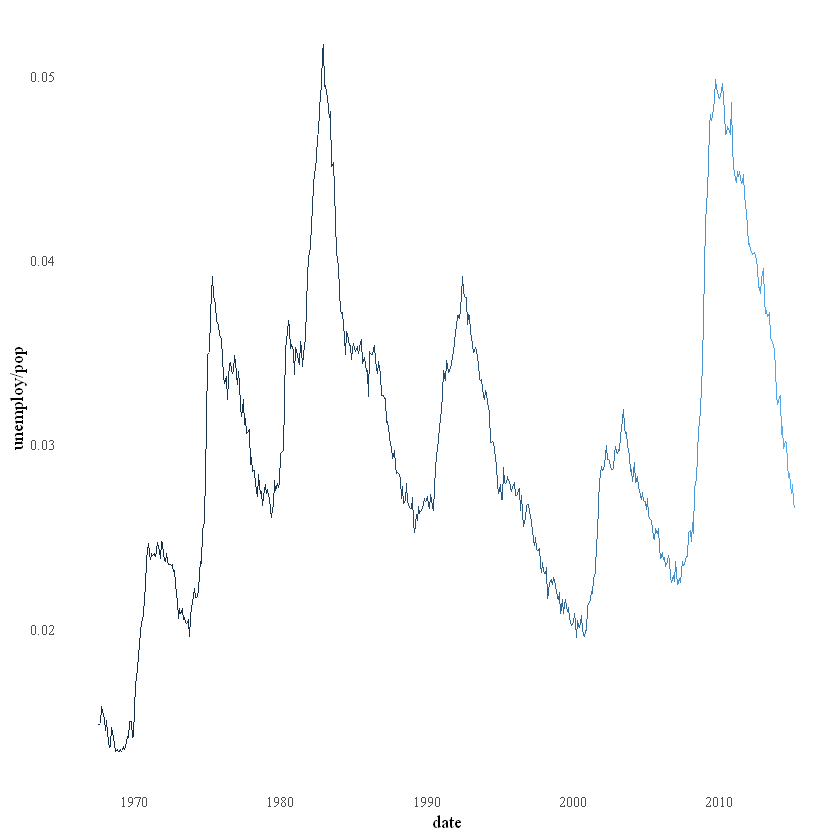

In [31]:
plt_prop_unemployed_over_time +
    theme_tufte() +
    # Add individual theme elements
    theme(
    # Turn off the legend
    legend.position = "none",
    # Turn off the axis ticks
    axis.ticks =element_blank()
    )

- Set the axis title and axis text's text color to `grey60`.

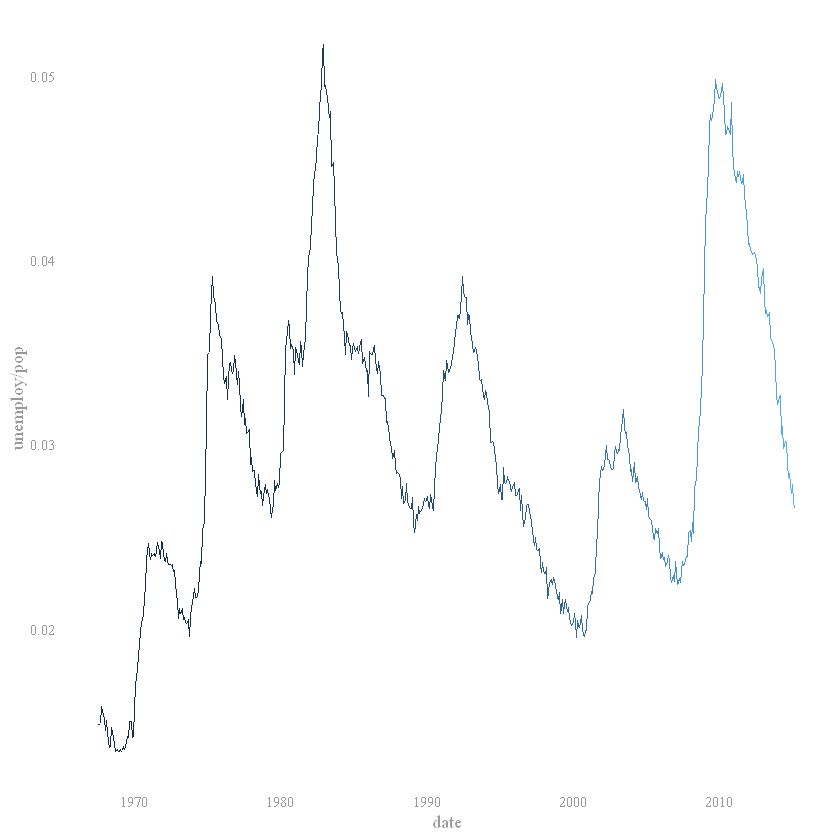

In [32]:
plt_prop_unemployed_over_time +
  theme_tufte() +
  theme(
    legend.position = "none",
    axis.ticks = element_blank(),
    # Set the axis title's text color to grey60
    axis.title = element_text(color = "grey60"),
    # Set the axis text's text color to grey60
    axis.text = element_text(color = "grey60"),
  )

-   Set the panel gridlines major y values. Set the color to `grey60`, the size to `0.25`, and the line type to `dotted`.


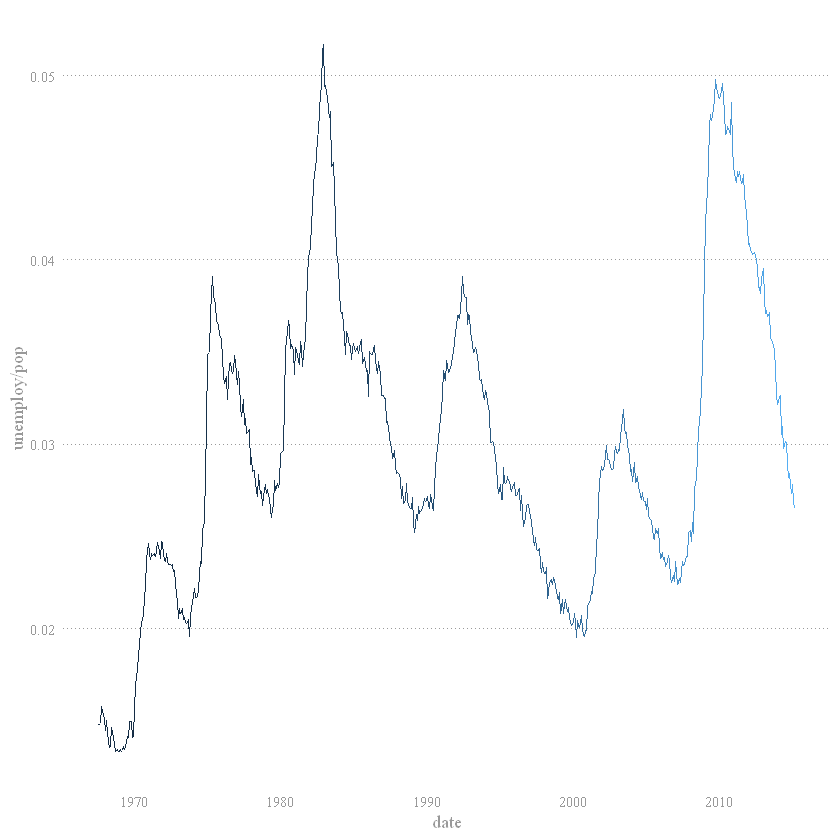

In [33]:
plt_prop_unemployed_over_time +
  theme_tufte() +
  theme(
    legend.position = "none",
    axis.ticks = element_blank(),
    axis.title = element_text(color = "grey60"),
    axis.text = element_text(color = "grey60"),
    # Set the panel gridlines major y values
     panel.grid.major.y = element_line(
      # Set the color to grey60
      color = "grey60",
      # Set the size to 0.25
      size = 0.25,
      # Set the linetype to dotted
      linetype = "dotted"
    )
  )


### **`08-Using geoms for explanatory plots`**


In [34]:
library(dplyr)
library(ggplot2)

gm2007 <- read.csv("..\\00_Datasets\\gm2007.csv", header=TRUE)
str(gm2007)

'data.frame':	20 obs. of  3 variables:
 $ country  : chr  "Swaziland" "Mozambique" "Zambia" "Sierra Leone" ...
 $ lifeExp  : num  39.6 42.1 42.4 42.6 42.6 42.7 43.5 43.8 44.7 45.7 ...
 $ continent: chr  "Africa" "Africa" "Africa" "Africa" ...


- `geom_segment()` adds line segments and requires two additional aesthetics: `xend` and `yend`. To draw a horizontal line for each point, map `30` onto `xend` and `country` onto `yend`.


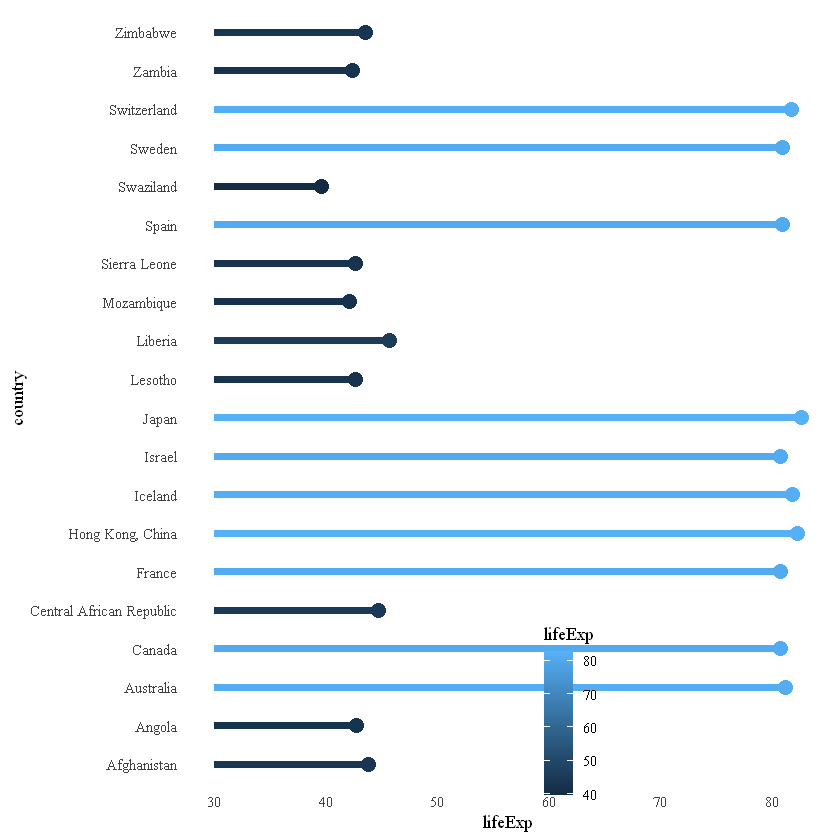

In [35]:
# Add a geom_segment() layer
ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2)

`geom_text` also needs an additional aesthetic: `label`. Map `lifeExp` onto `label`, and set the attributes `color` to `"white"` and `size` to `1.5`.


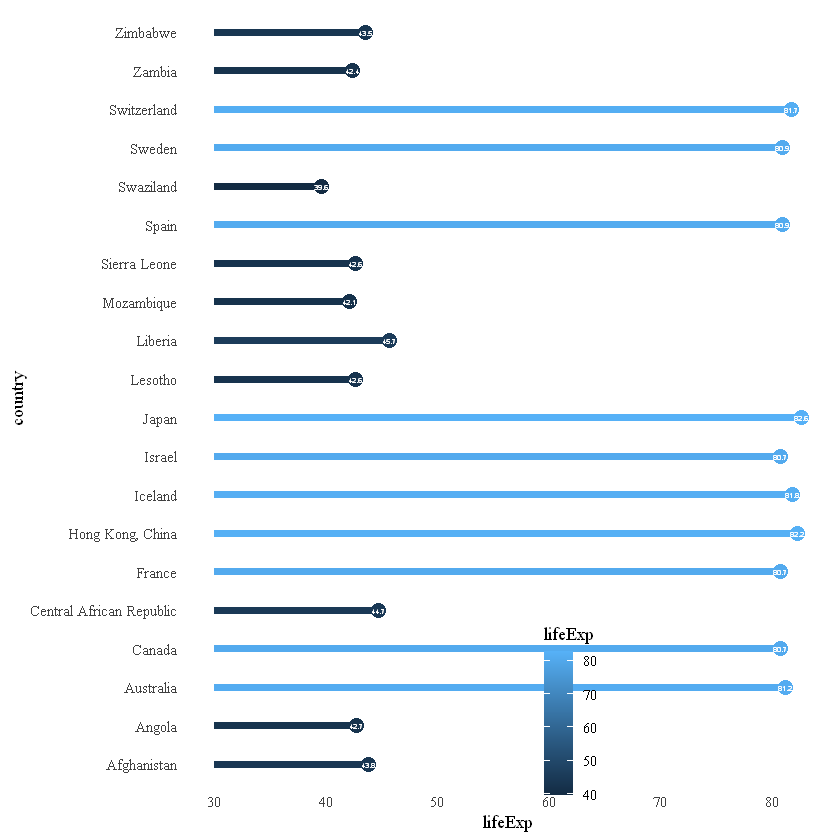

In [36]:
# Add a geom_text() layer
ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2) +
  geom_text(aes(label = lifeExp), color = "white", size = 1.5)

-   The color scale has been set for you, but you need to clean up the scales. For the x scale:

    -   Set `expand` to `c(0, 0)` and `limits` to `c(30, 90)`.

    -   Place the axis on the top of the plot with the `position` argument.

In [37]:
library("RColorBrewer")


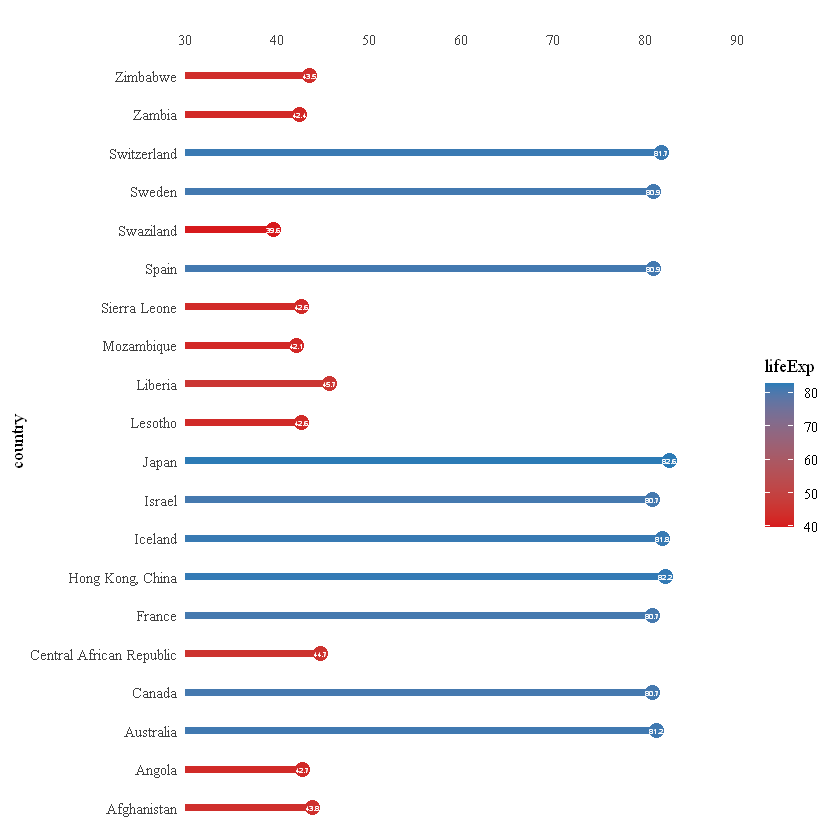

In [38]:
# Set the color scale
palette <- brewer.pal(5, "RdYlBu")[-(2:4)]

# Modify the scales
ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2) +
  geom_text(aes(label = round(lifeExp,1)), color = "white", size = 1.5) +
  scale_x_continuous("", expand = c(0, 0), limits = c(30, 90), position = "top") +
  scale_color_gradientn(colors = palette) + 
  theme(legend.position = "right")

Make sure to label the plot appropriately using `labs()`:

-   Make the title `"Highest and lowest life expectancies, 2007"`.

-   Add a reference by setting `caption` to `"Source: gapminder"`.


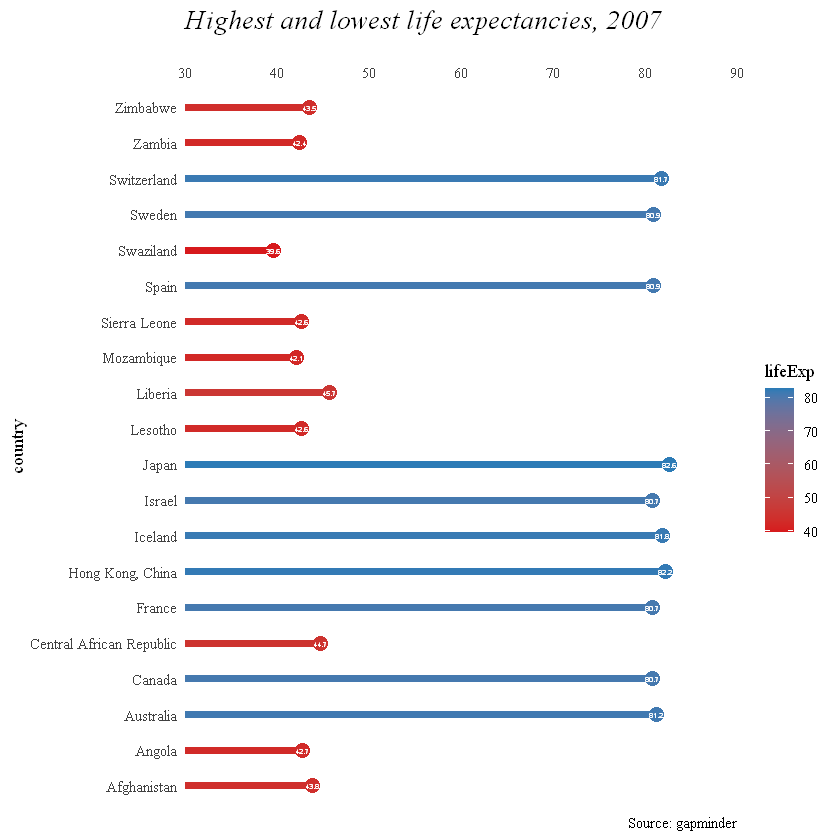

In [39]:
# Set the color scale
palette <- brewer.pal(5, "RdYlBu")[-(2:4)]

# Add a title and caption
plt_country_vs_lifeExp <- ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2) +
  geom_text(aes(label = round(lifeExp,1)), color = "white", size = 1.5) +
  scale_x_continuous("", expand = c(0,0), limits = c(30,90), position = "top") +
  scale_color_gradientn(colors = palette) +
  labs(title = "Highest and lowest life expectancies, 2007", caption = "Source: gapminder") + 
    theme(legend.position = "right")

plt_country_vs_lifeExp 

### **`09-Using annotate() for embellishments`**

In the previous exercise, we completed our basic plot. Now let's polish it by playing with the theme and adding annotations. In this exercise, you'll use `annotate()` to add text and a curve to the plot.

The following values have been calculated for you to assist with adding embellishments to the plot:

    global_mean <- mean(gm2007_full$lifeExp)
    x_start <- global_mean + 4
    y_start <- 5.5
    x_end <- global_mean
    y_end <- 7.5

Our previous plot has been assigned to `plt_country_vs_lifeExp`.


In [40]:
gm2007_full <- read.csv("..\\00_Datasets\\gm2007_full.csv", header=TRUE)
str(gm2007_full)

'data.frame':	142 obs. of  3 variables:
 $ country  : chr  "Swaziland" "Mozambique" "Zambia" "Sierra Leone" ...
 $ lifeExp  : num  39.6 42.1 42.4 42.6 42.6 42.7 43.5 43.8 44.7 45.7 ...
 $ continent: chr  "Africa" "Africa" "Africa" "Africa" ...


In [41]:
global_mean <- mean(gm2007_full$lifeExp)
x_start <- global_mean + 4
y_start <- 5.5
x_end <- global_mean
y_end <- 7.5

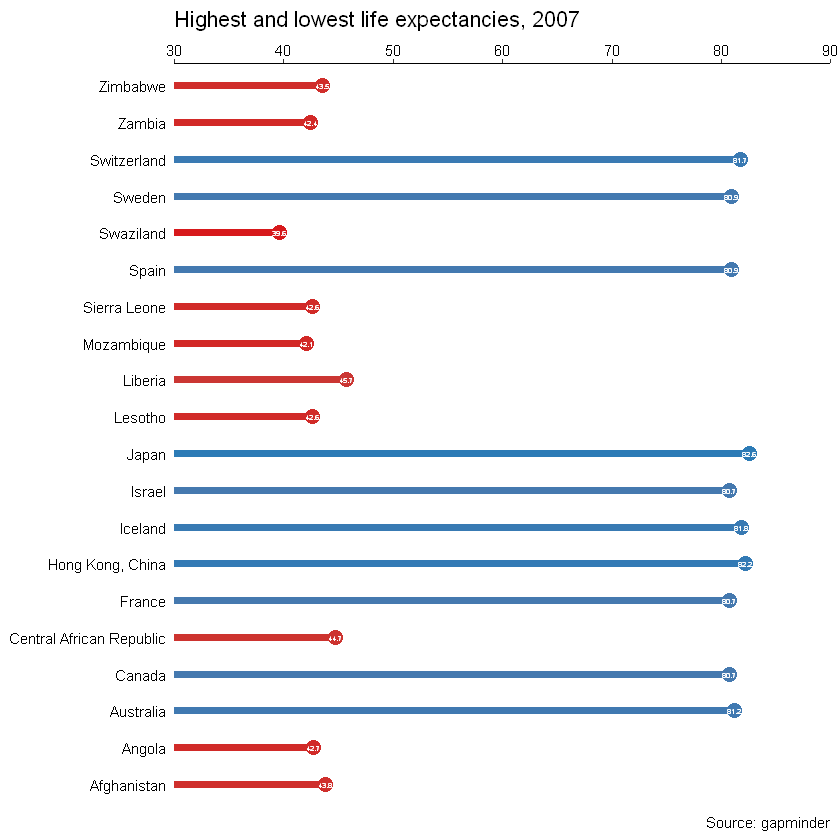

In [42]:
# Define the theme
plt_country_vs_lifeExp +
  theme_classic() +
  theme(axis.line.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text = element_text(color = "black"),
        axis.title = element_blank(),
        legend.position = "none")

- Use `geom_vline()` to add a vertical line. Set `xintercept` to `global_mean`, specify the color to be `"grey40"`, and set `linetype` to `3`.

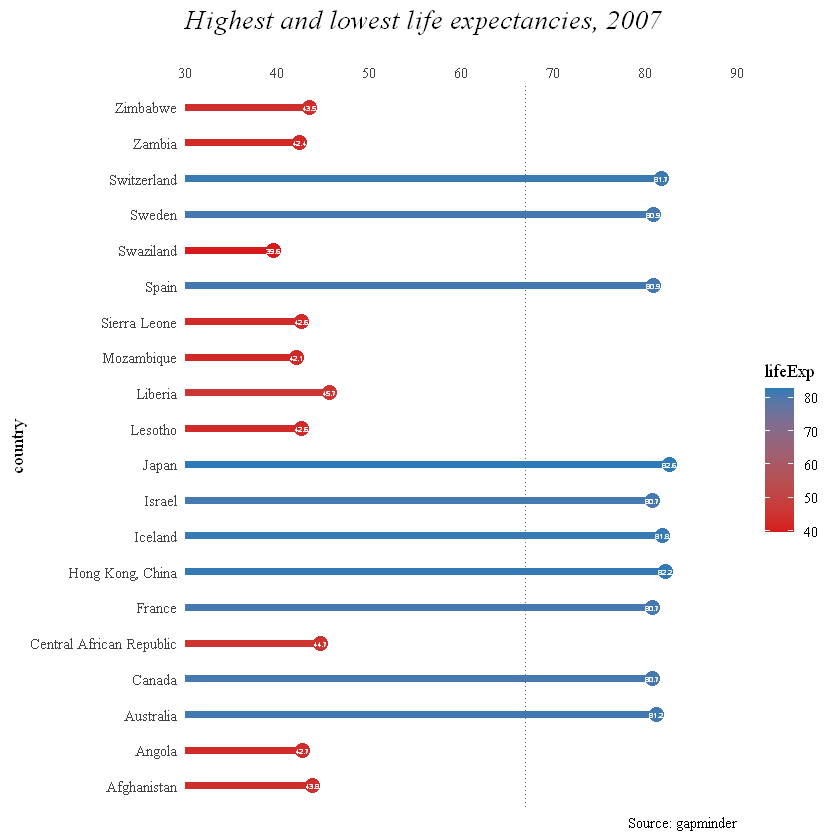

In [43]:
# Add a vertical line
plt_country_vs_lifeExp +
  #step_1_themes +
  geom_vline(xintercept = global_mean, color = "grey40", linetype = 3)

`x_start` and `y_start` will be used as positions to place text and have been calculated for you.

-   Add a `"text"` geom as an annotation.

-   For the annotation, set `x` to `x_start`, `y` to `y_start`, and `label` to `"The\nglobal\naverage"`.

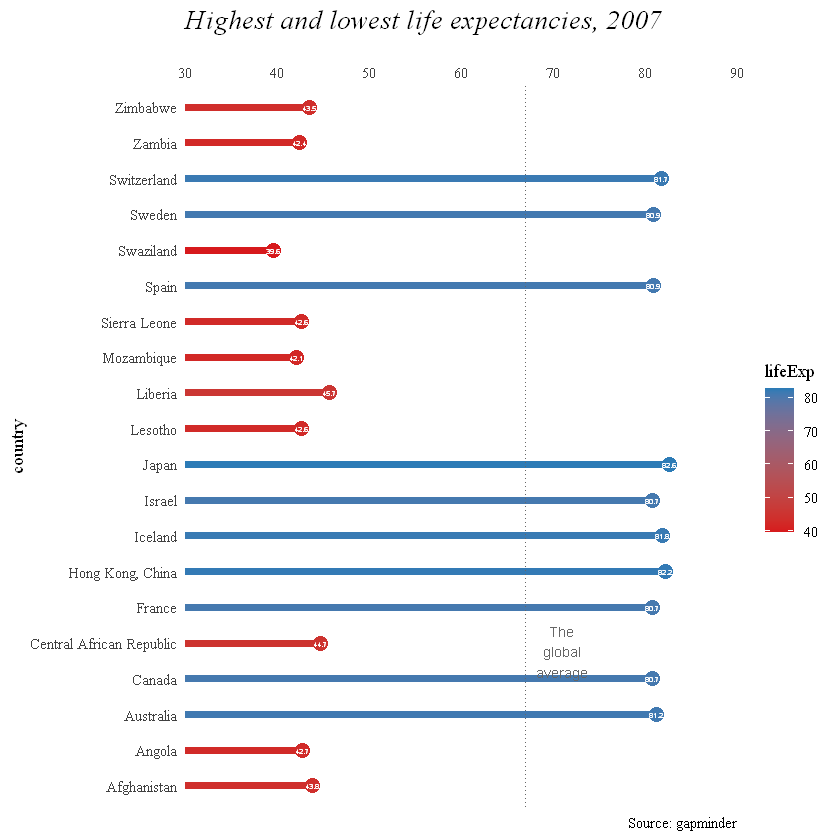

In [48]:
step_3_annotation <- annotate(
    "text",
    x = x_start, y = y_start,
    label = "The\nglobal\naverage",
    vjust = 1, size = 3, color = "grey40"
  )


# Add text
plt_country_vs_lifeExp +
  #step_1_themes +
  geom_vline(xintercept = global_mean, color = "grey40", linetype = 3) +
  step_3_annotation



Annotate the plot with an arrow connecting your text to the line.

-   Use a `"curve"` geom.

-   Set the arrow ends `xend` to `x_end` and `yend` to `y_end`.

-   Set the `length` of the arrowhead to 0.2 cm and the `type` to `"closed"`


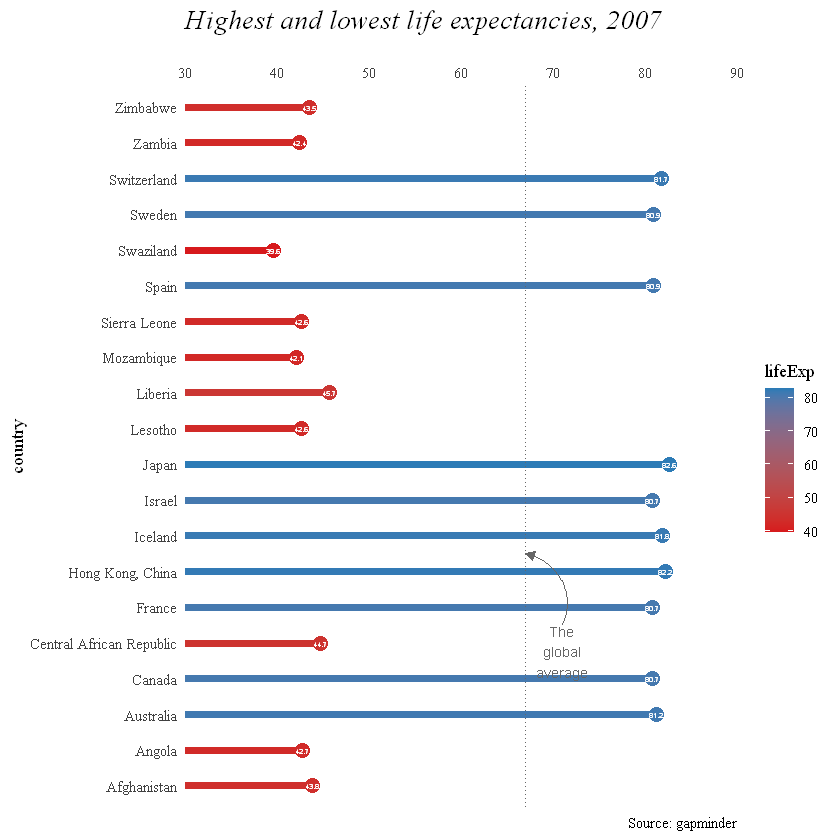

In [49]:
# Add a curve
plt_country_vs_lifeExp +  
  #step_1_themes +
  geom_vline(xintercept = global_mean, color = "grey40", linetype = 3) +
  step_3_annotation +
  annotate(
    "curve",
    x = x_start, y = y_start,
    xend = x_end, yend = y_end,
    arrow = arrow(length = unit(0.2 , "cm"), type = "closed"),
    color = "grey40"
  )

### `The End` 